In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/BestOneYet.csv")
df.head()

,Unnamed: 0,Optimum Time quantum,Avg Arrival Time,Max Arrival Time,Min Arrival Time,Avg Burst Time,Max Burst Time,Min Burst Time,Total Completion Time,Number of processes
0,0,12,5.368421,10,0,8.315789,12,1,158,19
1,1,12,4.176471,9,0,8.000000,12,1,136,17
2,2,15,3.866667,10,0,9.866667,15,4,148,15
3,3,13,4.764706,9,0,8.588235,13,3,146,17
4,4,14,4.421053,10,0,9.157895,14,5,174,19


In [4]:
y = df["Optimum Time quantum"]
df = df.drop(["Unnamed: 0", "Optimum Time quantum"], axis = "columns")

In [5]:
np.unique(y)

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [6]:
n_classes = len(list(np.unique(y)))

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = df
X_scaled = std.fit_transform(X)

#PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components = 0.99, random_state = 17)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [10]:
X_pca.shape

(10000, 7)

In [11]:
X.shape

(10000, 8)

#K means

On X

In [12]:
from sklearn.cluster import KMeans

In [13]:
k = KMeans(n_clusters = n_classes, n_init = 100, random_state = 17)

In [14]:
k.fit(X)

KMeans(n_clusters=11, n_init=100, random_state=17)

In [15]:
cluster_labels = k.labels_
np.unique(cluster_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

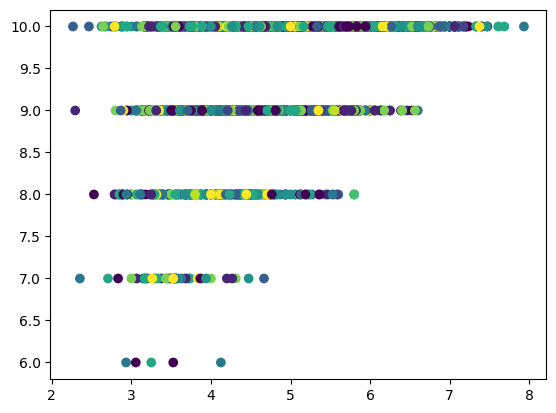

In [16]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = cluster_labels, cmap='viridis');

In [17]:
pd.crosstab(cluster_labels, y, margins=True)

Optimum Time quantum,5,6,7,8,9,10,11,12,13,14,15,All
row_0,,,,,,,,,,,,
0,0,0,0,0,1,2,23,133,314,439,319,1231
1,0,0,1,2,4,18,97,243,328,293,166,1152
2,0,0,0,0,0,0,2,29,130,259,236,656
3,0,0,6,0,6,27,105,154,144,89,41,572
4,1,1,2,1,7,39,114,261,293,251,122,1092
5,0,0,0,0,1,10,81,190,375,429,265,1351
6,0,0,0,0,0,7,45,160,337,445,283,1277
7,0,1,2,5,7,30,62,56,56,29,16,264
8,0,0,0,1,0,12,59,254,390,382,201,1299


In [18]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, cluster_labels)

0.013491655192737156

In [20]:
inertia = []
for i in range(1,11):
  k=KMeans(n_clusters=i,n_init=100,random_state=17)
  k.fit(X_scaled)
  k.transform(X_scaled)
  inertia.append(np.sqrt(k.inertia_))

[]

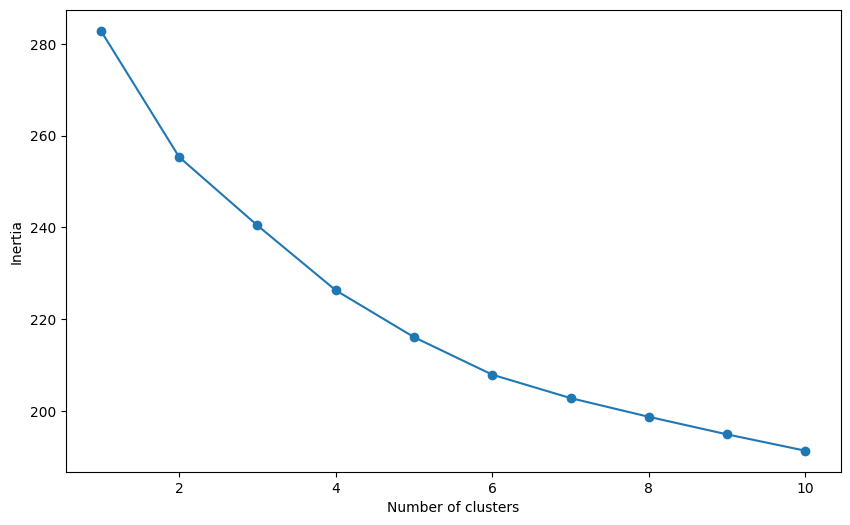

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.plot()

In [22]:
k=KMeans(n_clusters=2, n_init=100, random_state=17)
k.fit(X_scaled)
k.transform(X_scaled)
cluster_labels=k.labels_
adjusted_rand_score(y,cluster_labels)

0.06776983753369721

On X_pca

In [23]:
k = KMeans(n_clusters=n_classes,n_init=100,random_state=17)
k.fit(X_pca)

KMeans(n_clusters=11, n_init=100, random_state=17)

In [24]:
cluster_labels = k.labels_
np.unique(cluster_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

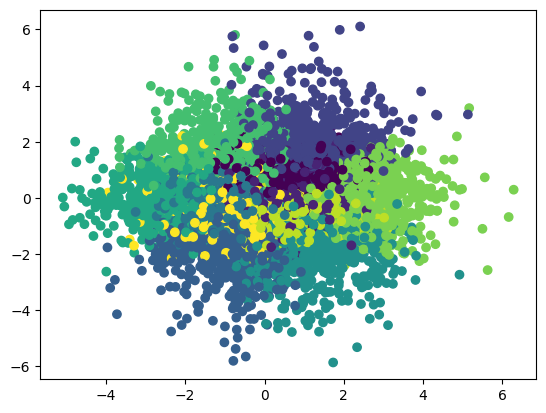

In [25]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis');

In [26]:
pd.crosstab(cluster_labels, y, margins=True)

Optimum Time quantum,5,6,7,8,9,10,11,12,13,14,15,All
row_0,,,,,,,,,,,,
0,0,0,1,0,1,2,11,74,282,376,174,921
1,0,0,0,1,0,19,114,425,459,73,2,1093
2,0,2,6,4,15,36,119,231,222,109,2,746
3,0,0,0,0,0,1,2,30,172,275,243,723
4,0,0,0,0,0,0,2,16,181,634,542,1375
5,0,0,1,1,1,6,33,156,257,224,129,808
6,0,0,0,0,0,0,2,32,162,385,359,940
7,0,0,0,0,2,7,39,140,256,261,13,718
8,1,0,2,2,6,69,247,330,137,10,0,804


In [27]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, cluster_labels)

0.060616655008456116

#C Means

In [28]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [29]:
X

,Avg Arrival Time,Max Arrival Time,Min Arrival Time,Avg Burst Time,Max Burst Time,Min Burst Time,Total Completion Time,Number of processes
0,5.368421,10,0,8.315789,12,1,158,19
1,4.176471,9,0,8.000000,12,1,136,17
2,3.866667,10,0,9.866667,15,4,148,15
3,4.764706,9,0,8.588235,13,3,146,17
4,4.421053,10,0,9.157895,14,5,174,19
...,...,...,...,...,...,...,...,...
9995,5.277778,10,0,8.666667,15,3,156,18
9996,4.263158,10,0,7.210526,14,1,137,19
9997,5.166667,10,0,8.111111,12,2,146,18
9998,5.333333,10,1,7.533333,15,3,113,15


In [30]:
from fcmeans import FCM
my_model = FCM(n_clusters = n_classes)
my_model.fit(X.to_numpy()) 

In [31]:
centers = my_model.centers
labels = my_model.predict(X.to_numpy())

In [32]:
centers

array([[4.99168406e+00, 9.85981816e+00, 1.77653397e-01, 9.36245298e+00,
        1.44401299e+01, 3.19933930e+00, 1.83090287e+02, 1.95774854e+01],
       [4.89730209e+00, 9.71112602e+00, 2.41756306e-01, 7.14475896e+00,
        1.29450874e+01, 2.03071272e+00, 1.11620512e+02, 1.56706006e+01],
       [5.01580743e+00, 9.77583169e+00, 2.32532974e-01, 7.74734309e+00,
        1.34455859e+01, 2.28069873e+00, 1.26960077e+02, 1.64668796e+01],
       [4.94358729e+00, 9.72018660e+00, 2.57082259e-01, 6.50993204e+00,
        1.25935756e+01, 1.71839989e+00, 1.00318876e+02, 1.54375677e+01],
       [4.99850127e+00, 9.82177701e+00, 2.05211571e-01, 8.00243867e+00,
        1.36957343e+01, 2.33690778e+00, 1.40471111e+02, 1.76504607e+01],
       [5.05664891e+00, 9.82851825e+00, 1.65595864e-01, 8.86905753e+00,
        1.42443828e+01, 2.73056087e+00, 1.71029809e+02, 1.93181181e+01],
       [4.98295557e+00, 9.79173832e+00, 1.97902743e-01, 8.29772259e+00,
        1.39500645e+01, 2.45964067e+00, 1.54004167e+02, 1.

In [33]:
labels

array([ 9,  7, 10, ..., 10,  1,  9])

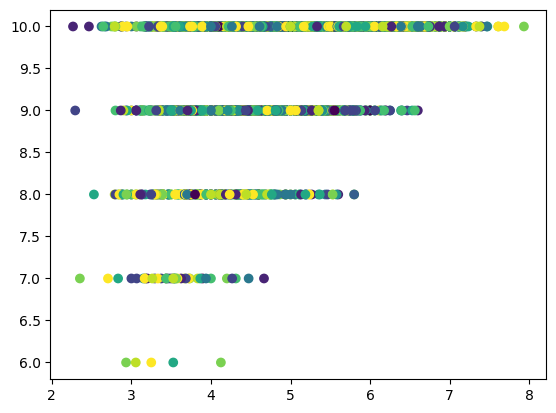

In [34]:
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')

In [35]:
pd.crosstab(labels, y, margins=True)

Optimum Time quantum,5,6,7,8,9,10,11,12,13,14,15,All
row_0,,,,,,,,,,,,
0,0,0,0,0,0,0,0,4,36,107,117,264
1,0,1,5,0,6,31,106,175,182,126,51,683
2,0,0,1,1,3,16,87,244,348,292,177,1169
3,0,1,3,5,7,36,87,80,75,40,25,359
4,0,0,0,0,1,10,75,172,344,384,237,1223
5,0,0,0,0,0,0,2,29,130,257,236,654
6,0,0,0,0,1,1,23,121,281,391,283,1101
7,0,0,0,1,0,11,56,242,364,391,205,1270
8,1,0,2,2,8,32,107,247,274,242,117,1032


In [36]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

0.013504203755658995